In [251]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_score,recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
%matplotlib inline

In [252]:
Empoyee_DF = pd.read_csv('EmployeeAttrition.csv')
Empoyee_DF.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [253]:
Empoyee_DF.shape

(1470, 35)

In [254]:
#checking for null values if at all any present

Empoyee_DF.isna().values.any()

False

In [255]:
Empoyee_DF.isnull().values.any()

False

In [256]:
#returns unique value counts from each column

Empoyee_DF.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [257]:
Empoyee_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [258]:
#Checking for categorical Columns and selecting them.

(Empoyee_DF.select_dtypes(include=['object'])).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [259]:
Categorical_columns=[]
for col in (Empoyee_DF.select_dtypes(include=['object'])): 
    Categorical_columns.append(col)
Categorical_columns

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [260]:
Empoyee_DF.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [261]:
# mapping categorical data to number
def mapping_cat_to_num(col_name):
    Empoyee_DF[col_name].unique()
    col_list = list(Empoyee_DF[col_name].unique())
    col_dict = {}
    for i in range (len(col_list)):
        col_dict[col_list[i]] = i
    return col_dict

In [262]:
categorical_column = list(Empoyee_DF.select_dtypes(exclude = ['number']).columns)
categorical_column

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [263]:
# cleaning categorical to numerical
cleanup_nums = {}
for i in categorical_column:
    cleanup_nums[i] = mapping_cat_to_num(i)
    

#Dictionary where cleanuo numerical values are stored for resoective categorical value
cleanup_nums

{'Attrition': {'Yes': 0, 'No': 1},
 'BusinessTravel': {'Travel_Rarely': 0,
  'Travel_Frequently': 1,
  'Non-Travel': 2},
 'Department': {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2},
 'EducationField': {'Life Sciences': 0,
  'Other': 1,
  'Medical': 2,
  'Marketing': 3,
  'Technical Degree': 4,
  'Human Resources': 5},
 'Gender': {'Female': 0, 'Male': 1},
 'JobRole': {'Sales Executive': 0,
  'Research Scientist': 1,
  'Laboratory Technician': 2,
  'Manufacturing Director': 3,
  'Healthcare Representative': 4,
  'Manager': 5,
  'Sales Representative': 6,
  'Research Director': 7,
  'Human Resources': 8},
 'MaritalStatus': {'Single': 0, 'Married': 1, 'Divorced': 2},
 'Over18': {'Y': 0},
 'OverTime': {'Yes': 0, 'No': 1}}

In [264]:
#Replace the cleaned data to numerical
Empoyee_DF.replace(cleanup_nums,inplace=True)

In [265]:
Empoyee_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [266]:
#thus all the values become numerical
#Let's Play with this

Empoyee_DF.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.838776,0.392517,802.485714,0.739456,9.192517,2.912925,1.462585,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.431780,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,465.000000,0.000000,2.000000,2.000000,0.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,1.000000,0.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


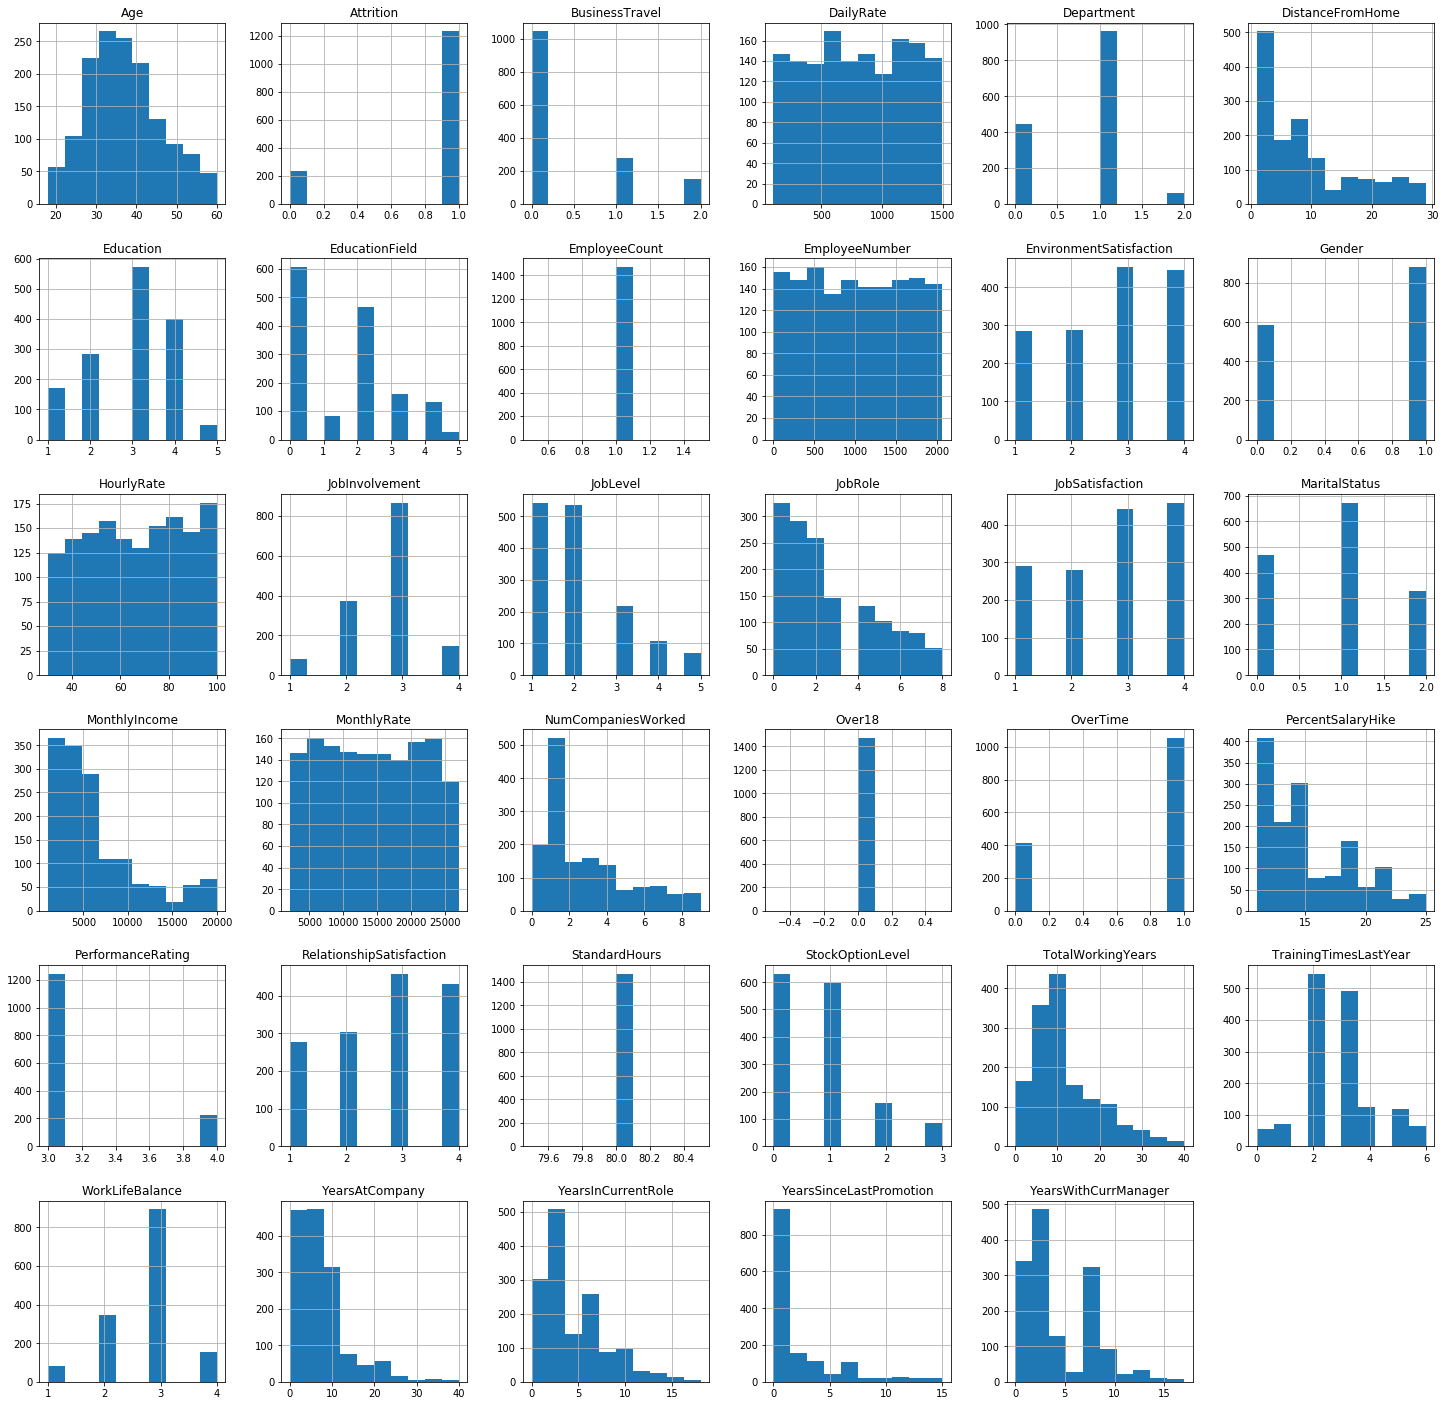

In [267]:
Empoyee_DF.hist(figsize=(25,25));

In [268]:
Empoyee_DF.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.007192,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.000074,0.056652,0.063991,-0.077924,0.031373,-0.075437,NaN,0.010577,...,0.045872,NaN,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,-0.024751,0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.017799,NaN,0.015578,...,0.035986,NaN,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.015942,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,-0.057499,NaN,0.010895,...,0.022414,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,-0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.020004,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,-0.002687,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.007192,-0.075437,-0.017799,-0.015942,-0.057499,0.020004,-0.002687,1.000000,NaN,0.007922,...,0.022723,NaN,0.020179,-0.002329,0.014553,0.033896,0.003061,-0.007728,0.004327,-0.001829
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,0.010577,0.015578,-0.050990,0.010895,0.032916,0.042070,0.007922,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


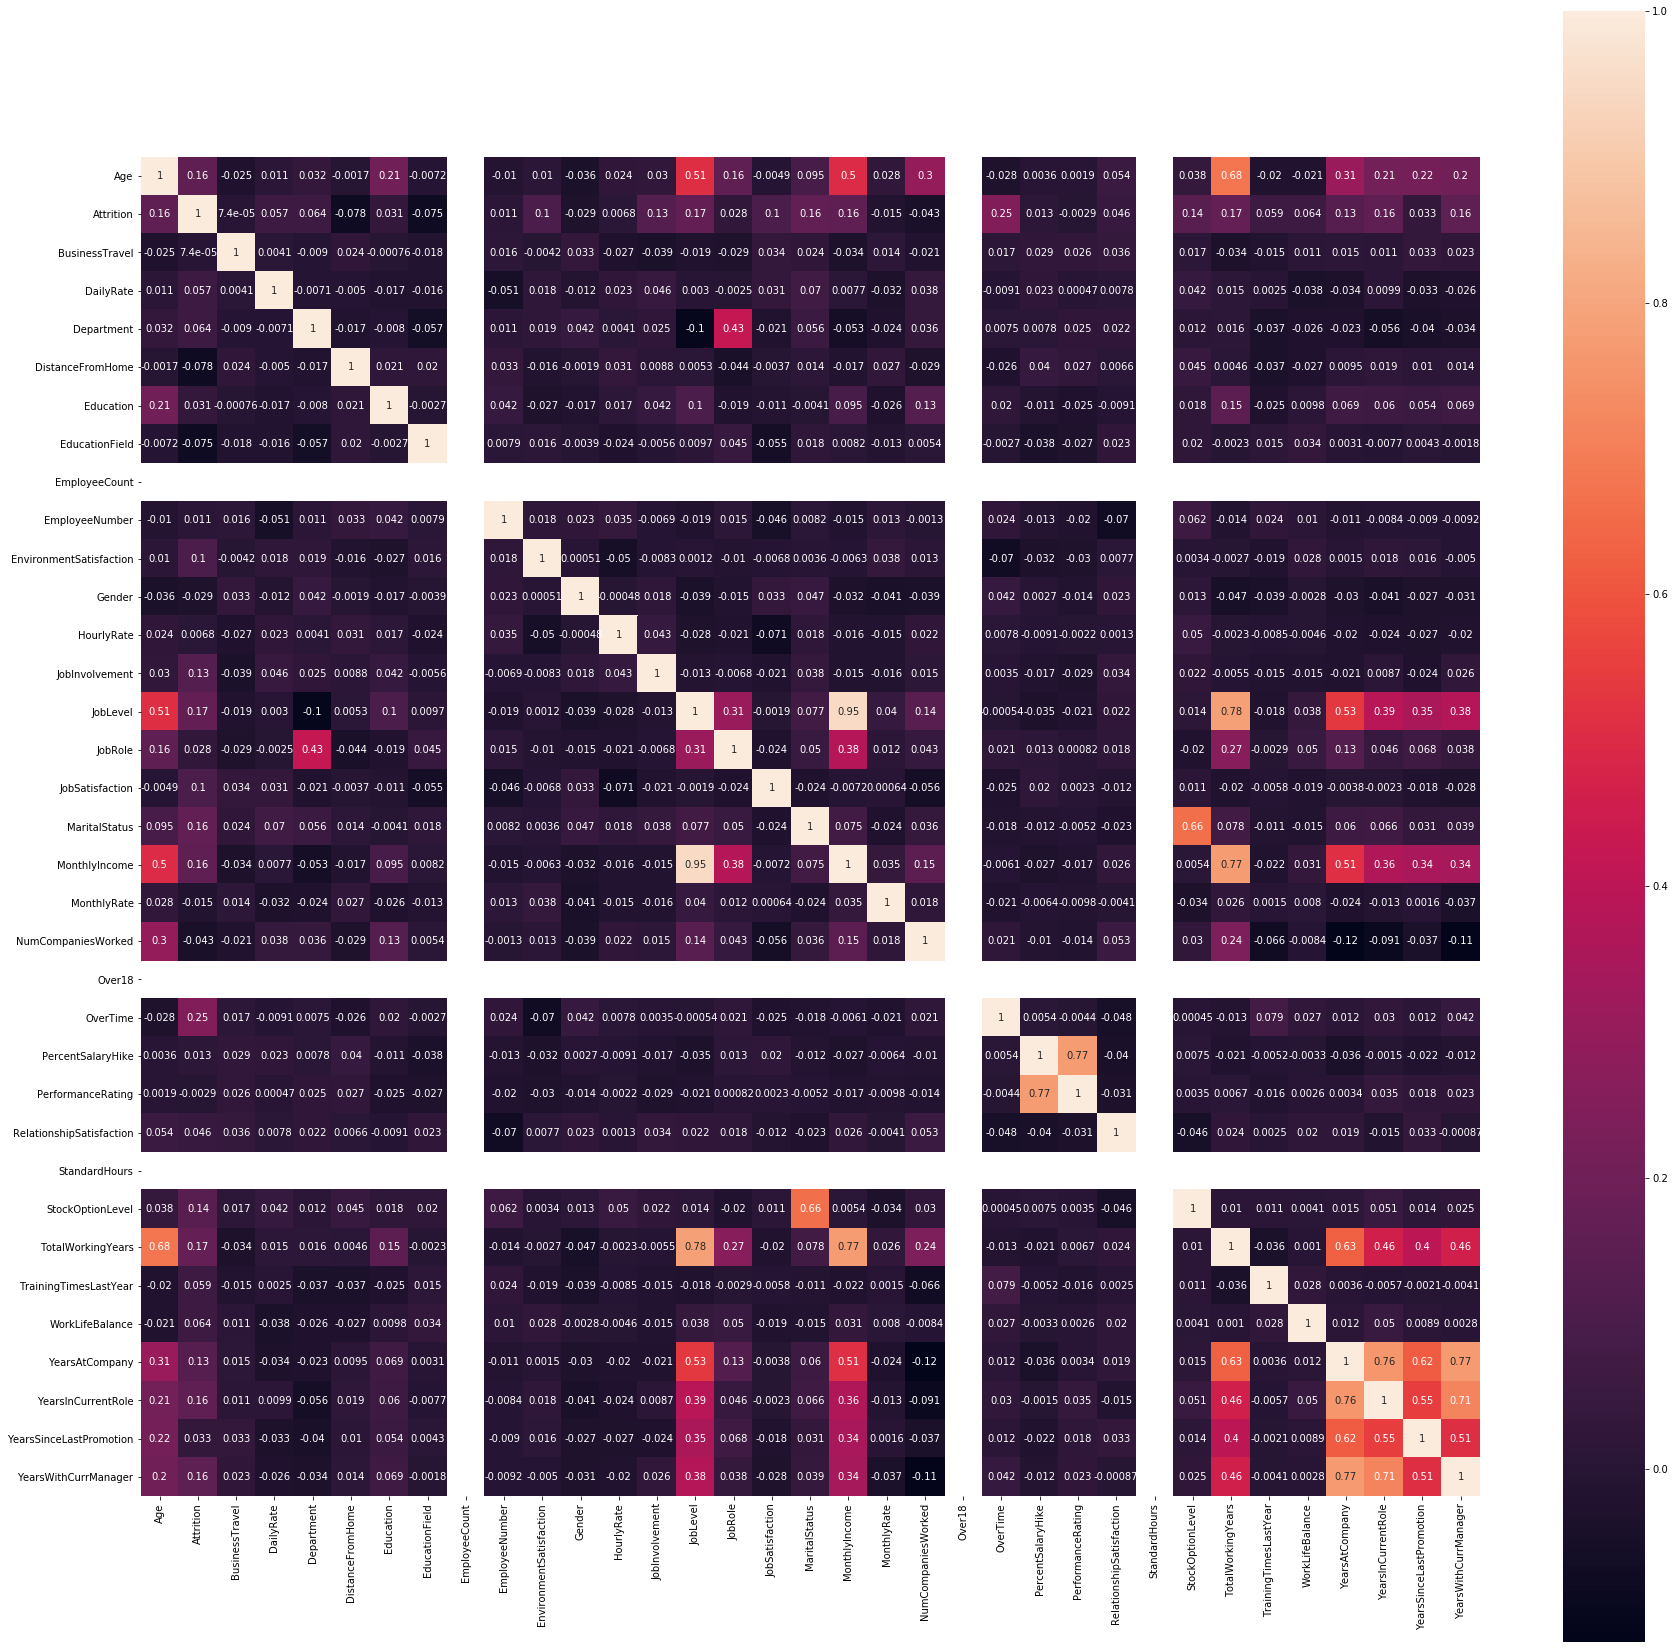

In [269]:
plt.figure(figsize=(30,30))
sns.heatmap(Empoyee_DF.corr(),vmax=1.0, square=True, linecolor='Red', annot=True)

In [270]:
features=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


#drop 'Attrition' COlumn as it is a target column

Train_features=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']


In [271]:
X=Empoyee_DF[Train_features]
y=Empoyee_DF['Attrition']


# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [272]:
print ("Shape of x_train: ", X_train.shape)
print ("Shape of y_train: ", y_train.shape)
print ("Shape of x_test:  ", X_test.shape)
print ("Shape of y_test:  ", y_test.shape)

print ("\nValue counts for y_train:\n", y_train.value_counts())
print ("\nValue counts for y_test: \n", y_test.value_counts())

Shape of x_train:  (1102, 34)
Shape of y_train:  (1102,)
Shape of x_test:   (368, 34)
Shape of y_test:   (368,)

Value counts for y_train:
 1    923
0    179
Name: Attrition, dtype: int64

Value counts for y_test: 
 1    310
0     58
Name: Attrition, dtype: int64


In [273]:
#defining Support Vector matrix Classifier
svc = LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
svc.fit(X_train, y_train)

C:\Users\buyre\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [274]:
#SVC model
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

[[ 35  23]
 [159 151]]
              precision    recall  f1-score   support

           0       0.18      0.60      0.28        58
           1       0.87      0.49      0.62       310

    accuracy                           0.51       368
   macro avg       0.52      0.55      0.45       368
weighted avg       0.76      0.51      0.57       368

Accuracy: 0.5054347826086957


In [275]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
Perceptron()
clf.score(X_train, y_train)

0.3312159709618875

In [276]:
# predicted output
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


print("Accuracy:",accuracy_score(y_test, y_pred))

[[ 51   7]
 [251  59]]
              precision    recall  f1-score   support

           0       0.17      0.88      0.28        58
           1       0.89      0.19      0.31       310

    accuracy                           0.30       368
   macro avg       0.53      0.53      0.30       368
weighted avg       0.78      0.30      0.31       368

Accuracy: 0.29891304347826086


In [277]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

# Decision Tree

In [278]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree = decision_tree.fit(X_train,y_train)

In [279]:
decision_tree.score(X_train,y_train)

1.0

In [280]:
# predicted output
y_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


print("Accuracy:",accuracy_score(y_test, y_pred))

[[ 16  42]
 [ 35 275]]
              precision    recall  f1-score   support

           0       0.31      0.28      0.29        58
           1       0.87      0.89      0.88       310

    accuracy                           0.79       368
   macro avg       0.59      0.58      0.59       368
weighted avg       0.78      0.79      0.79       368

Accuracy: 0.7907608695652174


In [281]:
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

In [282]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [283]:
# making predictions on the testing set
y_pred = nb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100 , '%')

Accuracy: 80.16304347826086 %


In [284]:
nb = GaussianNB(priors=None, var_smoothing=1e-06)

nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-06)

In [285]:
# making predictions on the testing set
y_pred = nb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100 , '%')

Accuracy: 85.32608695652173 %


# KNN

In [286]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
X=Empoyee_DF[Train_features]
y=Empoyee_DF['Attrition']


# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



#knn = KNeighborsClassifier(n_neighbors=7) 
#knn.fit(X_train, y_train)

#print("Accuracy is:",knn.score(X_test, y_test))

Max_Acc=[]
Max_predicted_Acc=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("\nAccuracy is:",knn.score(X_test, y_test), "at k :", i)
    print("\tAccuracy_Predicted:",accuracy_score(y_test, y_pred),"at k :", i)
    Max_Acc.append(knn.score(X_test, y_test))
    Max_predicted_Acc.append(accuracy_score(y_test, y_pred))
    
    
print("\nMax Accuracy is:",max(Max_Acc),"at k : ",Max_Acc.index(max(Max_Acc))+1)
print("\nMax Predicted Accuracy is:",max(Max_predicted_Acc),"at k : ",Max_predicted_Acc.index(max(Max_predicted_Acc))+1)


Accuracy is: 0.7690217391304348 at k : 1
	Accuracy_Predicted: 0.7690217391304348 at k : 1

Accuracy is: 0.6847826086956522 at k : 2
	Accuracy_Predicted: 0.6847826086956522 at k : 2

Accuracy is: 0.8097826086956522 at k : 3
	Accuracy_Predicted: 0.8097826086956522 at k : 3

Accuracy is: 0.7717391304347826 at k : 4
	Accuracy_Predicted: 0.7717391304347826 at k : 4

Accuracy is: 0.8179347826086957 at k : 5
	Accuracy_Predicted: 0.8179347826086957 at k : 5

Accuracy is: 0.7961956521739131 at k : 6
	Accuracy_Predicted: 0.7961956521739131 at k : 6

Accuracy is: 0.8342391304347826 at k : 7
	Accuracy_Predicted: 0.8342391304347826 at k : 7

Accuracy is: 0.8233695652173914 at k : 8
	Accuracy_Predicted: 0.8233695652173914 at k : 8

Accuracy is: 0.842391304347826 at k : 9
	Accuracy_Predicted: 0.842391304347826 at k : 9

Accuracy is: 0.8288043478260869 at k : 10
	Accuracy_Predicted: 0.8288043478260869 at k : 10

Accuracy is: 0.8342391304347826 at k : 11
	Accuracy_Predicted: 0.8342391304347826 at k : 


Accuracy is: 0.842391304347826 at k : 91
	Accuracy_Predicted: 0.842391304347826 at k : 91

Accuracy is: 0.842391304347826 at k : 92
	Accuracy_Predicted: 0.842391304347826 at k : 92

Accuracy is: 0.842391304347826 at k : 93
	Accuracy_Predicted: 0.842391304347826 at k : 93

Accuracy is: 0.842391304347826 at k : 94
	Accuracy_Predicted: 0.842391304347826 at k : 94

Accuracy is: 0.842391304347826 at k : 95
	Accuracy_Predicted: 0.842391304347826 at k : 95

Accuracy is: 0.842391304347826 at k : 96
	Accuracy_Predicted: 0.842391304347826 at k : 96

Accuracy is: 0.842391304347826 at k : 97
	Accuracy_Predicted: 0.842391304347826 at k : 97

Accuracy is: 0.842391304347826 at k : 98
	Accuracy_Predicted: 0.842391304347826 at k : 98

Accuracy is: 0.842391304347826 at k : 99
	Accuracy_Predicted: 0.842391304347826 at k : 99

Max Accuracy is: 0.845108695652174 at k :  17

Max Predicted Accuracy is: 0.845108695652174 at k :  17


In [288]:
print("\nMax Accuracy is:",max(Max_Acc),"at k : ",Max_Acc.index(max(Max_Acc))+1)
print("\nMax Predicted Accuracy is:",max(Max_predicted_Acc),"at k : ",Max_predicted_Acc.index(max(Max_predicted_Acc))+1)


Max Accuracy is: 0.845108695652174 at k :  17

Max Predicted Accuracy is: 0.845108695652174 at k :  17


In [289]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [290]:
#Create copy of dataset.
df_model = Empoyee_DF.copy()


#Feature scaling using Robust Scalar
scaler = RobustScaler()

for feature in features:
    df_model[[feature]] = scaler.fit_transform(df_model[[feature]])

#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df_model.drop(columns=['Attrition'])
y = df_model['Attrition']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)



#Training the model
Max=[]
Max_predicted_Acc=[]

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("\nAccuracy is:",knn.score(x_test, y_test), "at k :", i)
    print("\tAccuracy_Predicted:",accuracy_score(y_test, y_pred),"at k :", i)
    Max.append(knn.score(x_test, y_test))
    Max_predicted_Acc.append(accuracy_score(y_test, y_pred))

    
    
    
print("\nMax Accuracy is:          ",max(Max),"at k : ",Max.index(max(Max))+1)
print("\nMax Predicted Accuracy is:",max(Max_predicted_Acc),"at k : ",Max_predicted_Acc.index(max(Max_predicted_Acc))+1)

#Predict testing set

#Check performance using accuracy
#
#Check performance using roc
#print("ROC:     ",roc_auc_score(y_test, y_pred))


Accuracy is: 0.8027210884353742 at k : 1
	Accuracy_Predicted: 0.8027210884353742 at k : 1

Accuracy is: 0.7414965986394558 at k : 2
	Accuracy_Predicted: 0.7414965986394558 at k : 2

Accuracy is: 0.8435374149659864 at k : 3
	Accuracy_Predicted: 0.8435374149659864 at k : 3

Accuracy is: 0.8197278911564626 at k : 4
	Accuracy_Predicted: 0.8197278911564626 at k : 4

Accuracy is: 0.8537414965986394 at k : 5
	Accuracy_Predicted: 0.8537414965986394 at k : 5

Accuracy is: 0.8435374149659864 at k : 6
	Accuracy_Predicted: 0.8435374149659864 at k : 6

Accuracy is: 0.8639455782312925 at k : 7
	Accuracy_Predicted: 0.8639455782312925 at k : 7

Accuracy is: 0.8571428571428571 at k : 8
	Accuracy_Predicted: 0.8571428571428571 at k : 8

Accuracy is: 0.8571428571428571 at k : 9
	Accuracy_Predicted: 0.8571428571428571 at k : 9

Accuracy is: 0.8537414965986394 at k : 10
	Accuracy_Predicted: 0.8537414965986394 at k : 10

Accuracy is: 0.8639455782312925 at k : 11
	Accuracy_Predicted: 0.8639455782312925 at k 


Accuracy is: 0.8537414965986394 at k : 91
	Accuracy_Predicted: 0.8537414965986394 at k : 91

Accuracy is: 0.8537414965986394 at k : 92
	Accuracy_Predicted: 0.8537414965986394 at k : 92

Accuracy is: 0.8537414965986394 at k : 93
	Accuracy_Predicted: 0.8537414965986394 at k : 93

Accuracy is: 0.8537414965986394 at k : 94
	Accuracy_Predicted: 0.8537414965986394 at k : 94

Accuracy is: 0.8537414965986394 at k : 95
	Accuracy_Predicted: 0.8537414965986394 at k : 95

Accuracy is: 0.8537414965986394 at k : 96
	Accuracy_Predicted: 0.8537414965986394 at k : 96

Accuracy is: 0.8537414965986394 at k : 97
	Accuracy_Predicted: 0.8537414965986394 at k : 97

Accuracy is: 0.8537414965986394 at k : 98
	Accuracy_Predicted: 0.8537414965986394 at k : 98

Accuracy is: 0.8537414965986394 at k : 99
	Accuracy_Predicted: 0.8537414965986394 at k : 99

Max Accuracy is:           0.8639455782312925 at k :  7

Max Predicted Accuracy is: 0.8639455782312925 at k :  7


In [291]:
print("\nMax Accuracy is:          ",max(Max),"at k : ",Max.index(max(Max))+1)
print("\nMax Predicted Accuracy is:",max(Max_predicted_Acc),"at k : ",Max_predicted_Acc.index(max(Max_predicted_Acc))+1)



Max Accuracy is:           0.8639455782312925 at k :  7

Max Predicted Accuracy is: 0.8639455782312925 at k :  7
